In [485]:
# coding: utf-8
###========================================================###
###========================================================###
###         IDENTITY-BASED LINKABLE RING SIGNATURE         ###
###========================================================###
###========================================================###

from timeit import default_timer as timer
import sys
import random
import time
import hashlib
import statistics
import os
import matplotlib.pyplot as plt 

In [200]:
def gauss_function_number(x, c, s):
    """
    * Input:
        - x: a variable
        - c: a center
        - s: a Gaussian paramter
    * Output:
        - exp(-pi*(x-c)^2/s^2)
    """
    #If x,c are real numbers
   
    return exp(-pi*(x-c)^2/s^2)
   

s=RR.random_element(1,10)

x=random_vector(ZZ,3)
c=random_vector(ZZ,3)
#x=randint(0,10)
#c=randint(0,10)

#=================
def gauss_function_vector(x, c, s):
    """
    * Input
        - a variable x
        - a center c
        - a Gaussian paramter s
    * Output:
        - exp(-pi*(x-c)^2/s^2)
    """
    #If x,c are real numbers
    return exp(-pi*(x-c).norm()^2/s^2)


#=======================================================
# A TEST CASE

s=RR.random_element(1,10)

xx=random_vector(ZZ,3)
cc=random_vector(ZZ,3)
x=randint(0,10)
c=randint(0,10)

print(RR(gauss_function_number(x,c, s)))

print(RR(gauss_function_vector(xx,cc, s)))


0.659211750170128
6.33299350738525e-8


In [292]:
from sage.stats.distributions.discrete_gaussian_integer import DiscreteGaussianDistributionIntegerSampler
def sample_z(s,c):
    """
    Sample from D_{ZZ,s,c} defined by \rho_s,c(x):=exp(-(x-c)^2/(2s^2))
    s: Gaussian parameter
    c: center
    Input:
    
    Output:
    
    See at https://doc.sagemath.org/html/en/reference/stats/sage/stats/distributions/discrete_gaussian_integer.html
    """
    D=DiscreteGaussianDistributionIntegerSampler(s, c)
    return D()

#=======================================================
# A TEST CASE
sample_z(2,0)
#histogram([sample_z(2,0) for _ in range(200)])

0

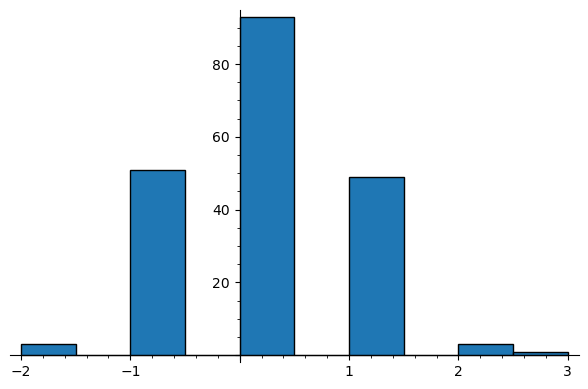

In [213]:
def sample_z_gpv08(s,c,n=3):
    """
    Sample from D_{ZZ,s,c} defined by rho_s,c(x):=exp(-(x-c)^2/(2s^2))
    * Input:
        - s: Gaussian parameter
        - c: center
        - n: security parameter. However, we can see it as the dimension 
           (when you want to use sample_z_gpv08 in sample_d_gpv08 to sample 
           lattice vectors of an n-dimensional lattice)
    * Output:
        - An integer x ~ D_{ZZ,s,c} defined by rho_s,c(x):=exp(-(x-c)^2/(2s^2))
    See at https://doc.sagemath.org/html/en/reference/stats/sage/stats/
        distributions/discrete_gaussian_integer.html
    """
    t=log(n,2)
    x=randint(c-s*t,c+s*t)
    #u=RR.random_element(0,1)
    u=uniform(0, 1)
    while gauss_function_number(x,c,s)<=u:
        x=randint(c-s*t,c+s*t)
        u=uniform(0, 1)
    return x

#=======================================================
# A TEST CASE
s=2
c=0
n=1024
histogram([sample_z_gpv08(s,c,n) for _ in range(200)])

In [214]:
def coeff_x(xx,yy):
    """
    * Compute <xx,yy>/||yy||^2
    * Input:
        - xx, yy: two vectors of same length
    * Output:
        - <xx,yy>/||yy||^2        
    """
    return (xx.dot_product(yy))/(yy.dot_product(yy))


In [300]:
def sample_d_gpv08(AA, s, cc):
    """
    * Sample a lattice vector of lattice L(AA)  (SampleD in [GPV08, Section 4.2])
    * Input:
        - cc: center vector
        -  s: Gaussian parameter
        - AA: basis of a lattice
    * Output:  lattice_vector: a vector of lattice L(AA) 
    """    
    
    vv=copy(cc)
    BB=AA.gram_schmidt()[0]
    m=BB.nrows()
    n=BB.ncols()
    lattice_vector=zero_vector(ZZ, n)           # closest_vector:=zero_vector
    i=m
    while i>0:
        i=i-1
        c_i_dash=coeff_x(cc,BB[i])
        s_i_dash=s/(BB[i].norm())
        z_i=sample_z(s_i_dash,c_i_dash)
        cc=cc-z_i*AA[i]
        lattice_vector=lattice_vector + z_i*AA[i]
    return lattice_vector

#=============================================================
# A TEST CASE
AA=random_matrix(ZZ, 3, 3)
s=randint(1,8)
cc=random_vector(ZZ,3)
print("AA=")
print(AA)
print("s=",s)
print("cc=",cc)
sample_d_gpv08(AA, s, cc)
#histogram([sample_d_gpv08(AA,s,cc) for _ in range(200)])

AA=
[ -1   1   0]
[  1   0  -1]
[  0  -6 -29]
s= 5
cc= (-1, 0, 1)


(-3, 2, 1)

AA=
[-1  4  0]
[-1 -1 -4]
[ 4  1 11]
s= 2
cc= (5, 0, 0)


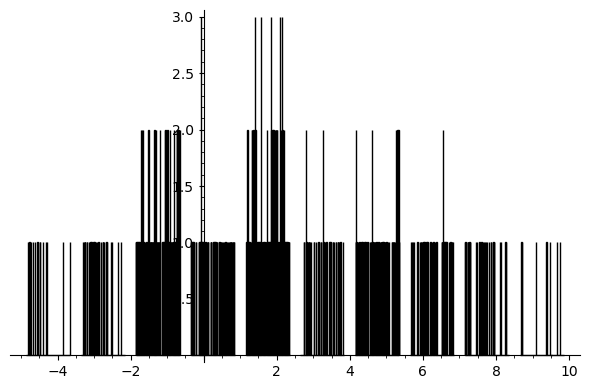

In [298]:
from sage.stats.distributions.discrete_gaussian_lattice import DiscreteGaussianDistributionLatticeSampler

def sample_d(BB,s,cc):
    """
    This algorithm is to sample a lattice vector from D_{L(BB),s,cc}, defined by \rho_s,c(x):=exp(-||x-c||^2/(2s^2))
    * Input:
        - BB: a basis for the lattice L(BB) (BB can be input as ZZ^m)
        - s: Gaussian parameter
        - cc: center vector
    * Output:
        - A lattice vector sampled from discrete Gaussian D_{L(BB),s,cc}
     See at https://doc.sagemath.org/html/en/reference/stats/sage/stats/
     distributions/discrete_gaussian_lattice.html

    """
    
    D=DiscreteGaussianDistributionLatticeSampler(BB, s, cc)
    return D()


#==========================================================
# A TEST CASE
print("AA=")
print(AA)
print("s=",s)
print("cc=",cc)
#sampleD(ZZ^3,s, cc)
#DiscreteGaussianDistributionLatticeSampler(BB, sigma, cc)

#sample_d(BB,sigma,cc)
histogram([sample_d(AA,s,cc) for _ in range(200)])

In [217]:
# This algorithm is to generate the gadget vector gg=(1 2 4 8....2^{k-1}) via [MP12]
def gadget_vector(k):
    """
    This algorithm is to generate the gadget vector gg=(1 2 4 8....2^{k-1}) via [MP12]
    * Input: 
        - k: dimension of the output vector gg
    * Output:  
        - gg=(1 2 4 8....2^{k-1}).
    """
    return vector([2**i for i in range(k)])


In [218]:

def gadget_matrix(n, q):
    """
    This algorithm is to generate the gadget matrix GG via [MP12]

                             |gg  0   0  ...   0 |
                             |0   gg  0  ...   0 |
          Gadget matrix GG=  |0   0   gg ...   0 |    
                             |...................|
                             |0   0    0 ...   gg|
                
    Input: 
        - n: number of rows of GG
        - q: modulus
    
    Output:                 
        - The gadget matrix GG.
    """
  
 
    k=ceil(log(q,2))
    m=n*k
    ZZq = IntegerModRing(q)
    #vector gg=[1 2 4 8....2^{k-1}] 
    gg=gadget_vector(k)
    #print("gg=",gg)
    
    # Initialize GG as a zero matrix in ZZ^{n x m}
    GG=zero_matrix(ZZ,n, m)
    #print("GG=")
    #print(GG)
    
    # For each row i, we change elements at i*k+j for j in [0,..,k-1] by gg[j]
    for i in range(n):
        for j in range(k):
            GG[i,i*k+j]=gg[j]
    #print("GG=")
    #print(GG)
    # Change ring of GG into ZZ_q
    GG.change_ring(ZZq)
    
    return GG

#======================================
# A TEST CASE
GG=gadget_matrix(3, 17)
print("GG=")
print(GG)

GG=
[ 1  2  4  8 16  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  1  2  4  8 16  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  1  2  4  8 16]


In [343]:
def random_invertible_matrix(modulus=1, size=3):
    """
    Input:
    - modulus: modulus of the base ring, such as modulus=5 then we consider the ring ZZ_5 
    - size: default value is 3
    Output: A matrix that is invertible in ZZ_q, with q=modulus
    """
    # By default, if modulus=1, we are working in ZZ
    if modulus==1:
        V = ZZ**size
        vectors = []
        for i in range(size):
            vv = V.random_element()
            while vv in V.span(vectors):
                vv = V.random_element()
            vectors.append(vv)
    # If modulus q>=2, we are working in ZZ_q        
    if modulus >=2:
        ZZq = IntegerModRing(modulus)
        V = ZZq**size
        vectors = []
        for i in range(size):
            vv = V.random_element()
            while vv in V.span(vectors):
                vv = V.random_element()
            vectors.append(vv)
    return(Matrix(vectors))

#======================================================
# A TEST CASE 
AA=random_invertible_matrix(5, 4)
print("AA=")
print(AA)
print("AA is invertible?===> Answer:", AA.is_invertible())

AA=
[3 1 2 1]
[3 1 2 4]
[0 2 2 1]
[4 4 1 1]
AA is invertible?===> Answer: True


In [464]:
def smoothing_parameter_of_ZZ(epsilon):
    """
    This algorithm computes the smoothing parameter eta_epsilon(ZZ).
    * Input:
        - epsilon: a very small positive real number. E.g., we can set epsilon=2^(-71) or epsilon=2^(-84)
    * Output:
        - smoothing parameter eta_epsilon(ZZ), which is denoted by smt_para
    
    """
    smt_para=RR(sqrt(ln(2/epsilon)/pi))
    #print("smt_para=", smt_para)
    return smt_para


#======================================================
# A TEST CASE
epsilon=2^(-84)
smoothing_parameter_ZZ(epsilon)



smt_para= 3.98569482160776


3.98569482160776

In [465]:
def smoothing_parameter_q_ary_lattice(AA, q, epsilon):
    """
    This algorithm computes the smoothing parameter eta_epsilon(Lambda_q^{perp}(AA)) for the q-ary lattice Lambda_q^{perp}(AA).
    * Input:
        - AA; a matrix w.r.t the q-ary lattice Lambda_q^{perp}(AA)
        - q: modulus 
        - epsilon: a very small positive real number. E.g., we can set epsilon=2^(-71) or epsilon=2^(-84)
    * Output:
        - smoothing parameter eta_epsilon(Lambda_q^{perp}(AA)), which is denoted by smt_para
    """
    # Compute the basis for the q-ary lattice Lambda_q^{perp}(AA):
    BB=perpendicular_q_ary_basis(AA, q)
    # Dimension of BB (which is a square matrix)
    n=BB.nrows()
    #print("n=",n)
    
    #Compute Gram Schmidt of BB
    BB_gs=BB.gram_schmidt()[0]
    #print("||BB_gs||=", BB_gs.norm())
    #print("factor=", RR(sqrt(ln(2*n*(1+1/epsilon))/pi)))
    
    # Compute smoothing parameter of Lambda_q^{perp}(AA) using [MP12,Lemma 2.3] (also [GPV08, Theorem 3.1]) 
    smt_para=RR(BB_gs.norm()*sqrt(ln(2*n*(1+1/epsilon))/pi))   
    #print("smt_para=",smt_para)
    return smt_para


#======================================================
# A TEST CASE

q=13
m=4
n=10
epsilon=2^(-80)

ZZq=IntegerModRing(q)

AA=random_matrix(ZZq, m, n)
print("AA=")
print(AA)

smoothing_parameter_q_ary_lattice(AA,q,epsilon)


AA=
[ 5  4  1  6  6 12  5  8  4  2]
[ 0  8 12  9  5  8 11  8  2  1]
[ 6  7 11  7  0 11 10 12  0  6]
[12  1  0  7  9  2  9  2  3  0]


34.5062723214147

In [469]:
#==========================================================
def gen_trap_mp12(n, q, mt, option_HH, epsilon):
    """
    * Input:
        - n: number of rows (security parameter) of AA
        - q: modulus, q should be prime 
        - mt: a positive integer mt>=1
          Then number of columns m=mt+n*k, where k=ceil(log_2(q)), 
        - option_HH: 
                + If option_HH=0 (default) then HH is zero matrix. 
                + If option_HH=1 then HH=II, identity matrix
                + Otherwise, HH is chosen to be invertible in ZZq.   
        - epsilon: epsilon in the smoothing parameter eta_{epsilon}(ZZ) for ZZ.
          We can choose epsilon=2^(-71) or epsilon=2^(-84)
    * Output: 
        - A matrix AA and its trapdoor TT via MP12:
    """
    # Initial
    ZZq = IntegerModRing(q)
    k=ceil(log(q,2))
    w=n*k
    m=mt+w
    #print("mt=", mt)
    #print("nk=", n*k)
    
    #Generate (n x mt)-matrix AAt from ZZq
    AAt = random_matrix(ZZq,n,mt)
    #print("AAt=")
    #print(AAt)
    
    #Generate gadget matrix GG
    GG=gadget_matrix(n, q)
    #print("GG=")
    #print(GG)
    
    #Generate center for Discrete Gaussian
    cc=zero_vector(ZZ,w)
    #print("cc=")
    #print(cc)
    
    
    # Choose Gaussian parameter s for Discrete Gaussian w.r.t. smoothing parameter
    # Here we choose s= smoothing parameter of ZZ (i.e., s=\eta_{epsilon}(ZZ))
    # (See GPV08, at the beginning of Section 2)
    s=smoothing_parameter_of_ZZ(epsilon)
    print("s=", s)
    
    #sigma= ceil(sqrt(n))#sqrt(log(2+2:e,e):pi)
    #print("sigma=",sigma)
    
    #Generate trapdoor via D_{ZZ^w,s,cc}
    TT=Matrix([sample_d(ZZ^w,s,cc) for i in range(mt)])
    #print("TT=")
    #print(TT)
    
    #Generate n-dimensional matrix H that is invertible in ZZ_q
    if option_HH==0:
        HH=zero_matrix(ZZq,n)
    elif option_HH==1:
        HH=identity_matrix(ZZq,n)
    else:
        HH=random_invertible_matrix(q,n)
    #print("HH=")
    #print(HH)
    
    # Change into ZZ
    HHz=HH.change_ring(ZZ)
    GGz=GG.change_ring(ZZ)
    AAtz=AAt.change_ring(ZZ)
    
    # Compute BBz=HHz*GGz-AAtz*TT in ZZ and take modulo q
    BBz=HHz*GGz-AAtz*TT
    #print("BBz=")
    #print(BBz)
    
    BBz=BBz%q
    
    # Change into ZZq
    BB=BBz.change_ring(ZZq)        
    #print("BB=")
    #print(BB)
    
    # Set AA=[AAt|BB]
    AA=AAt.augment(BB, subdivide=True)
    #print("AA=")
    #print(AA)
    
    return (AA, HH, TT, q)


#=======================================================
# A TEST CASE
n=5
q=13
mt=2
option_HH=2
epsilon=2^(-71)
(AA,HH,TT, q)=gen_trap_mp12(n,q,mt,option_HH, epsilon)
print("AA=")
print(AA)
print("HH=")
print(HH)
print("TT=")
print(TT)
#==========================================================  

s= 3.98569482160776
AA=
[ 7  1| 6 11 11  1  2 11  3  9 12  8  3  5  5 11 10  8  5 10  7  5]
[11  4|12  5  8  4  3  3 11 11  2  6  0  5  8  2  0  2  4  2 10 10]
[ 2  5| 4  6 11  4 12  8  1  6  1  5  2  5 10  0  4  3  8 12  2 11]
[ 0  5| 4  5  4  0  3  7  7  0  3  3  5  9  8  0  0  7  5  3  0  7]
[ 5  6| 1 10 11  3 12 10  2  1 12 12  4  4  4 10  4  2  4 11  6 10]
HH=
[ 0  4  5  6  2]
[ 2  1  0 11  2]
[ 5 11  5 10  4]
[12 10  7  1  6]
[10  3  9  4  7]
TT=
[ 3 -1  2 -4 -4 -6  5  1  0 -3  4 -6 -3  9  3 -1  4  0 -5  3]
[-1 -4  1  1  4 13  4  3 -7 -3  2 -1 -4  3 -7 -5 -5 -6 -3  3]


In [430]:
epsi=RR(2^(-71))
r=RR(sqrt(ln(2/epsi)/pi))
print(r)

3.98569482160776


In [423]:
def perpendicular_q_ary_basis(AA, q):
    """
    *Input:
        - AA: A (n x m)-matrix in ZZq
        - q: a modulus
    *Output: 
        - A basis CC for the q-ary lattice Lambda_q^{perp}(AA) generated by the matrix AA in modulo q, 
        i.e., the lattice L(AA)={x^m in ZZ^m: xx.AA=0 mod q}
        
    """
    # number of rows in AA
    n=AA.nrows()
    m=AA.ncols()
    
    #print("m=",m)
    #print("n=",n)
    
    #Compute “left kernel” (or left_nullspace, i.e. the space of vectors ww such that ww.AA=0
    #left_kernel_of_AA=kernel(AA.transpose()) #or 
    #left_kernel_of_AA=kernel(AA.transpose()) 
    # Note that, we have to perform on input AA.transpose() instead of AA
    WW=Matrix(kernel(AA.transpose()) .basis()).change_ring(ZZ)
    #print("WW=")
    #print(WW)
    
    # Generate matrix q*IIn where IIn is the identity matrix of dimension n
    qIIn=q*identity_matrix(ZZ,n) 
    #print("q_IIn=")
    #print(q_IIn)
    
    # Generate (n x (m-n))-zero matrix KK
    KK=zero_matrix(ZZ,n, m-n)
    #print("KK=")
    #print(KK)
    
    # Concatenate KK with qIIn
    BB=KK.augment(qIIn, subdivide=True).change_ring(ZZ)
    #print("BB=")
   # print(BB)
    
    # The basis is:
    CC=WW.stack(BB, subdivide=True)  
    #print("CC=")
    #print(CC)
    
    return CC


#=======================================================
# A TEST CASE
q=13
n=4
m=10

ZZq=IntegerModRing(q)
AA=random_matrix(ZZq, n, m)
#AA_hnf=AA.echelon_form()
#print("AA_hnf=")
#print(AA_hnf)
    
print("AA=")
print(AA)
perpendicular_q_ary_basis(AA, q)


AA=
[11  8  8  6 11  1  5  8  3 10]
[11  2 10  4  5  4 10 10  3  8]
[ 9 11  0  4  7  6  8  6 11  6]
[12  7  1  9  2  9  7  9  8 10]


[ 1  0  0  0  0  0  4  1 11 11]
[ 0  1  0  0  0  0  7  1  5  9]
[ 0  0  1  0  0  0  7 10  7  9]
[ 0  0  0  1  0  0  4 10  1  6]
[ 0  0  0  0  1  0  2  3  3  5]
[ 0  0  0  0  0  1  5 12  7  0]
[-----------------------------]
[ 0  0  0  0  0  0 13  0  0  0]
[ 0  0  0  0  0  0  0 13  0  0]
[ 0  0  0  0  0  0  0  0 13  0]
[ 0  0  0  0  0  0  0  0  0 13]

In [243]:
def modulo_inverse_matrix(matrix, modulus):
    """
    * Input: 
        - matrix: A matrix e.g. AA
        - modulus: A modulus e.g., q
    * Output:
        - The inverse matrix modulo q of matrix AA if modulus=q and matrix = AA 
    """
    AA=matrix
    q=modulus
    
     # determinant of the matrix AA, i.e., det(AA)
    determinant=AA.det()   
    #print("determinant=", determinant)
    
    # inverse of the matrix AA
    inverse_of_AA=AA.inverse() 
    #print("inverse_of_AA=")
    #print(inverse_of_AA)
    
    # inverse modulo q of det(AA) 
    det_inverse=inverse_mod(q, determinant)                    
    #print("det_inverse=", det_inverse)
    
     # inverse modulo q of matrix AA
    inverse_of_AA_in_modulo_q=(det_inverse*determinant*inverse_of_AA)%q       
    #print("inverse_of_AA_in_modulo_q=")
    #print(inverse_of_AA_in_modulo_q)
    
    return inverse_of_AA_in_modulo_q

#=======================================================
# A TEST CASE
q=5
n=4
k=8
inverse_mod(q,k)
print("k=",k)
LL=random_invertible_matrix(5, 4)
print("LL=",LL)

KK=modulo_inverse_matrix(LL, q)
print("KK=",KK)

k= 8
LL= [4 2 2 4]
[1 2 1 2]
[1 2 0 0]
[4 3 2 3]
KK= [0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]


In [244]:
def operator_norm(matrix):
    """
    * Input:
        - a matrix, say, LL
        -
    * Output:Compute the operator norm (or sup norm) of matrix, say AA, defined as s_1(LL)=sup(||LLuu||/||uu||).
    * Steps:
        - Trasform the base-ring of the matrix into the RDF ring
        - Perform the Singular Value Decomposition to get LL=AA.BB.CC in which BB is a diagonal matrix and s_1(LL)=BB[0][0]. 
    """
    matrix=matrix.change_ring(RDF)
    #print("matrix=")
    #print(matrix)
    
    # Singular Value Decomposition of 
    (AA,BB,CC)=matrix.SVD()
    #print("AA=")
    #print(AA)
    #print("BB=")
    #print(BB)
    #print("CC=")
    #print(CC)
   
    return BB[0][0]


#=======================================================
# A TEST CASE
#matrix= Matrix([[1, 4],[5, 6]])
matrix=random_matrix(ZZ,3,5)
operator_norm(matrix)

10.037214056780215

q= 8
k= 3
gg= (1, 2, 4)
u= 5
xx= (1, -2, 14)
gg*xx mod 8 = 5


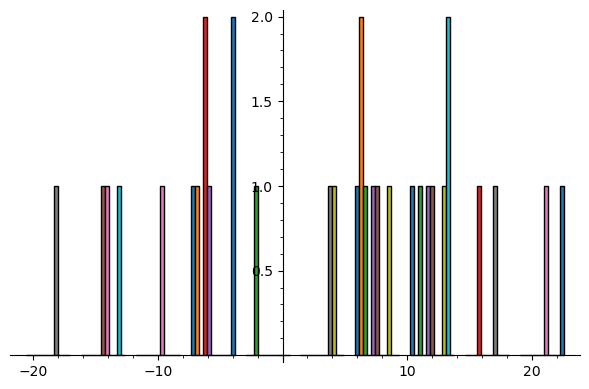

In [245]:
#======= This algorithm is used when q IS EXACTLY a power of 2, i.e, q=2^k ========
def sample_from_gadget_vector_power_of_2(q, u, n):
    """
    This algorithm is used when q IS EXACTLY a power of 2, i.e, q=2^k.
    It implements the second approach of Gaussian sampling in 
                [MP12, Section 4.1] for the case q=2^k
    * Input:
        - q: modulus which is q=2^k, k is positive integer. 
             Remember that the dimension k of gaget vector gg=(1, 2,..., 2^{k-1})
        - u: a coset, which is an integer in {0,...,q-1}
        - n: number of rows in         
                                         |gg  0   0  ...   0 |
                                         |0   gg  0  ...   0 |
                      Gadget matrix GG=  |0   0   gg ...   0 |    
                                         |...................|
                                         |0   0    0 ...   gg|
    * Output: a vector xx in ZZ^k s.t. <gg,xx>=u mod q, where gg=(1 2 4 ... 2^{k-1})
    """
    #Gausian parameter which is an optimal bound on the smoothing parameter of \Lambda^{perp}(GG) 
    sigma=2*sqrt(log(n,2))
    k=log(q,2)
    #
    list_of_vector_x=[]
    
    # sample z_i form D_{ZZ,s,0} and compute x_i=2z_i+u. Then, assign -z_i to u.
    for i in range(k):
        z_i=sample_z(s,0)
        x_i=2*z_i+u
        u=-z_i
        list_of_vector_x.append(x_i)
        
    # return x = vector(list_of_vector_x)
    return vector(list_of_vector_x)    


#=======================================================
# A TEST CASE
q=8
n=10
k=log(8,2)
print("q=",q)
print("k=",k)

gg=gadget_vector(k)
print("gg=", gg) 
u=randint(0,q-1)
print("u=",u)
xx=sample_from_gadget_vector_power_of_2(q, u, n)
print("xx=", xx) 

print("gg*xx mod", q, "=", gg*xx%q)    
histogram([sample_from_gadget_vector_power_of_2(q,u, n) for _ in range(11)])

In [246]:
def basis_of_gadget_vector(q):
    """
    This algorithm is to generate the basis for the q-ary lattice Lambda_q^{perp}(gg),
    where gg=[1 2 4 ... 2^{k-1}] is the gadget vector. 
    
    * Input:
        - q: modulus
    * Output:
        - basis SS_k for the q-ary lattice Lambda_q^{perp}(gg) w.r.t 
          the gadget vector gg=[1 2 4 ... 2^{k-1}], with k=ceil(log_2(q))
    
    """
 
    # bit size of q
    k=ceil(log(q,2))
    
    # bit decomposition of q
    bits_of_q=q.bits()
    # print("bits_of_q=", bits_of_q)
    
    # Initialize SS_k as a zero matrix in ZZ^{k x k}
    SSk=zero_matrix(ZZ, k, k)
    # print("SS_k=")
    # print(SSk)
    
    # For each column i
    for j in range(k-1):
        SSk[j,j]=2
        SSk[j+1,j]=-1
        
    # For the last column, i.e., j=k-1 
    # if q=2^k, we set the (k,k)-th element to be 2
    if q==2^k:
            SSk[k-1,k-1]=2
    # if q!=2^k , we change the last column by the list bits_of_q
    else:
        for i in range(k):
            SSk[i,k-1]=bits_of_q[i]
    # print("SS_k=")
    # print(SSk)
    
    return SSk
    
#=======================================================
# A TEST CASE

q=1025
bits_of_q=q.bits()
print("bits_of_q=", bits_of_q)
basis_of_gadget_vector(q)

bits_of_q= [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


[ 2  0  0  0  0  0  0  0  0  0  1]
[-1  2  0  0  0  0  0  0  0  0  0]
[ 0 -1  2  0  0  0  0  0  0  0  0]
[ 0  0 -1  2  0  0  0  0  0  0  0]
[ 0  0  0 -1  2  0  0  0  0  0  0]
[ 0  0  0  0 -1  2  0  0  0  0  0]
[ 0  0  0  0  0 -1  2  0  0  0  0]
[ 0  0  0  0  0  0 -1  2  0  0  0]
[ 0  0  0  0  0  0  0 -1  2  0  0]
[ 0  0  0  0  0  0  0  0 -1  2  0]
[ 0  0  0  0  0  0  0  0  0 -1  1]

In [247]:

def basis_of_gadget_matrix(n,q):
    """
    This algorithm is to generate the basis for the q-ary lattice Lambda_q^{perp}(GG), where
                           |gg  0   0  ...   0 |
                           |0   gg  0  ...   0 |
                      GG=  |0   0   gg ...   0 |    
                           |...................|
                           |0   0    0 ...   gg|,
     where gg=[1 2 4 ... 2^{k-1}] is the gadget vector. 
     
    * Input:
        - n: number of rows of the gadget matrix GG
        - q: modulus
    * Output:
        - basis SS for the q-ary lattice Lambda_q^{perp}(GG).
    """
     
    # Conpute a basis SSk for the q-ary lattice Lambda_q^{perp}(gg), 
    # where the gadget vector gg=[1 2 4 ... 2^{k-1}]
    SSk=basis_of_gadget_vector(q)
    IIn=identity_matrix(ZZ,n)
    
    # SS is the tensor product of IIn with SSk
    SS=IIn.tensor_product(SSk)
    return SS
    
#=======================================================
# A TEST CASE

q=11
n=4
SS=basis_of_gadget_matrix(n,q)
print("SS=")
print(SS)

SS=
[ 2  0  0  1| 0  0  0  0| 0  0  0  0| 0  0  0  0]
[-1  2  0  1| 0  0  0  0| 0  0  0  0| 0  0  0  0]
[ 0 -1  2  0| 0  0  0  0| 0  0  0  0| 0  0  0  0]
[ 0  0 -1  1| 0  0  0  0| 0  0  0  0| 0  0  0  0]
[-----------+-----------+-----------+-----------]
[ 0  0  0  0| 2  0  0  1| 0  0  0  0| 0  0  0  0]
[ 0  0  0  0|-1  2  0  1| 0  0  0  0| 0  0  0  0]
[ 0  0  0  0| 0 -1  2  0| 0  0  0  0| 0  0  0  0]
[ 0  0  0  0| 0  0 -1  1| 0  0  0  0| 0  0  0  0]
[-----------+-----------+-----------+-----------]
[ 0  0  0  0| 0  0  0  0| 2  0  0  1| 0  0  0  0]
[ 0  0  0  0| 0  0  0  0|-1  2  0  1| 0  0  0  0]
[ 0  0  0  0| 0  0  0  0| 0 -1  2  0| 0  0  0  0]
[ 0  0  0  0| 0  0  0  0| 0  0 -1  1| 0  0  0  0]
[-----------+-----------+-----------+-----------]
[ 0  0  0  0| 0  0  0  0| 0  0  0  0| 2  0  0  1]
[ 0  0  0  0| 0  0  0  0| 0  0  0  0|-1  2  0  1]
[ 0  0  0  0| 0  0  0  0| 0  0  0  0| 0 -1  2  0]
[ 0  0  0  0| 0  0  0  0| 0  0  0  0| 0  0 -1  1]


In [472]:
def sample_d_mp12(TT,AA,HH,uu,q, epsilon):
    """
    This algorithm is to sample vector from discrete Gaussian over q-ary lattice Lambda^{uu}^{perp}(AA);
    * Input:
        - TT: An (mt x w)-matrix trapdoor for matrix AA (TT is exactly RR in [MP12]) in ZZq.
          Here w=n*k, where k=ceil(log_2(q))
        - AA: A random (n x m)-matrix in ZZq
        - HH: An invertible (n x n)-matrix in ZZ_q (it is called the tag w.r.t AA, TT).
          However, we compute inverse of HH in ZZ instead of in ZZ_q. 
          If HH=zero_matrix then the algorithm will be stopped.
        - uu: An n-vector in ZZq
        - q: A modulus for the ring ZZq we are working in
        - epsilon: 
    * Output: 
        - A (pseudo-random) vector xx in the q-ary lattice Lambda_{uu}^{perp}(AA) 
          sampled from D_{Lambda_{uu^{perp}(AA)}
    """
    # Check if HH is invertible
    if HH.is_invertible()==False:
        print("The algorithm does not work in this case. Please choose the tag matrix to be invertible.")
        return ValueError
    # Dimensions, sizes 
    n=AA.nrows()
    #print("n=", n)
    m=AA.ncols()   
    #print("m=", m)
    mt=TT.nrows()   
    #print("mt=", mt)
    w=TT.ncols()         # Note that, m=mt+w
    #print("w=", w)
    
    ZZq = IntegerModRing(q)
 
    # operator norm of TT
    s1_TT=operator_norm(TT)
    
    # Gaussian parameters
    r=smoothing_parameter_of_ZZ(epsilon) # Here we choose r= smoothing parameter of ZZ (i.e., s=\eta_{epsilon}(ZZ))
                                         # (See GPV08, at the beginning of Section 2)
    sigma_GG = 5                 # sigma_GG: Gaussian parameter used to sample over the q-ary 
                                 # lattice Lambda_q^{perp}(GG). 
                                 # Via [MP12, Algorithm 3], sqrt(sigma_GG)>=2 or sigma_GG=sqrt(5). 
    sigma = 7*(s1_TT^2+1)
    sigma_pp = 2*(s1_TT^2+1)
    r_GG=r*sqrt(sigma_GG)
    r_pp = r*sqrt(sigma_pp)
  
    # Generate gadget matrix GG
    GG=gadget_matrix(n, q)
    #GGz=GG.change_ring(ZZ)
    #print("GG=")
    #print(GG)

       
    # Change ring for uu
    uuz=uu.change_ring(ZZ)  # We have to change ring. Otherwise, it will get an error notification.
    #print("uuz=",uuz)
     
    
    #Compute [TT^t I]^t[TT^t I] 
    IIw=identity_matrix(ZZ,w)
    KK=(TT.transpose()).augment(IIw)
    #print("KK=")
    #print(KK)
        
    # Stack of TT over IIw, i.e., matrix [TT^t|IIw]^t
    TT_over_IIw=TT.stack(IIw)
    
    # Choose pp from D_{ZZ^m,rp}====
    cc=zero_vector(ZZ,m)        # center vector
    pp=sample_d(ZZ^m,r_pp,cc)
    # print("pp=", pp)
    pp1=vector([pp[i] for i in range(mt)])
    pp2=vector([pp[i] for i in [mt..m-1]])
    # print("pp1=", pp1)
    # print("pp2", pp2)
    
    # Take matrix AA bar from matrix AA
    AAt=AA[[0..n-1],[0..mt-1]]
    AAtz= AAt.change_ring(ZZ)
    # print("AAt=");print(AAt)
   
    # vector ww bar
    wwt=(AAtz*(pp1-TT*pp2))%q
    ww=(GG*pp2)%q
    # wwtz=wwt.change_ring(ZZ)
    # wwz=ww.change_ring(ZZ)
    #print("wwtz=",wwt)
    #print("wwz=",ww)
    
    #Compute inverse of the tag HH
    HH_inv=HH.inverse() # If we use HH_inv=modulo_inverse_matrix(HH, q) it will be false
    
    #print("HH_inv=")
    #print (HH_inv)
    HH_invz=HH_inv.change_ring(ZZ)
    vv=(HH_invz*(uuz-wwt)-ww)%q 
    # vv=vv.change_ring(ZZq)
    #print("vv=",vv)
    
    # Find a vector tt in ZZ^{w} such that GGz*tt=vvz. 
    # We can easily see that tt=bit_decomposition of vvz, computed as follows:
    # each element of vvz (which is in ZZq) will have at most k=ceil(log(q,2)) bits.
    # Then if any element does not have enough k bits, then we append zeros to get k bits. 
    bit_decomp_of_vv=[]
    for i in range(len(vv)):
        list_of_bits=vv[i].bits()
        while len(list_of_bits)<k:
            list_of_bits.append(0)
        # print("vv[i].bits()=",list_of_bits)
        for j in range(k):
            bit_decomp_of_vv.append(list_of_bits[j])
    # print("bit_decomp_of_vv=",bit_decomp_of_vv) 
    tt=vector(bit_decomp_of_vv)
    # print("tt=",tt)
    # print(vv==GG*tt) #to check if GG*tt=vv
    
    # Basis SS for q-ary lattice w.r.t GG
    SS=basis_of_gadget_matrix(n,q)
    # print("SS=")
    # print(SS)
    
    # EE=GGz*SS%q
    # print("EE=")
    # print(EE)
    
    # Choose zz from Lamda_vv^{\perp}(GG) using Discrete Gaussian of parameter r*sqrt(sigma_GG)
    yy=sample_d(SS.transpose(), r_GG, -tt) # Note that, we input SS.transpose() instead of SS
    #print("yy=")
    #print(yy)
    
    #print("GG*yy=", (GG*yy)%q)
    
    zz=yy+tt
    #print("zz=")
    #print(zz)
    
    # Lattice vector that is sampled from D_{Lambda_{uu^{perp}(AA)} will be:
    xx= pp+TT_over_IIw*zz
    
    #print("AA*xx=", (AA*xx)%q)
    return xx


#=======================================================
# A TEST CASE
n=5
q=13
mt=2
option_HH=3
k=ceil(log(q,2))
print("k=",k)
epsilon=2^(-84)

(AA,HH,TT, q)=gen_trap_mp12(n,q,mt, option_HH, epsilon)

ZZq = IntegerModRing(q)
uu=random_vector(ZZq,n)
print("uu=", uu)

sample_d_mp12(TT,AA,HH,uu,q, epsilon)    
    

k= 4
s= 4.33059187790484
uu= (11, 4, 11, 3, 0)


(-17, -330, -199, 199, 155, -192, 46, 65, -123, -169, 133, -31, -22, 215, -117, 25, -16, 62, 153, -227, 262, -94)

In [470]:
def del_trap_mp12(AA, HH, TT, AA_1, HH_new, q, epsilon):
    """
    * Input:
        - AA
        - AA_1
        - HH
        - TT
        - HH_new: 
        - q: modulus 
        - epsilon: 
        
    * Output:
        - Output the MP12 trapdoor TT_new for AA_new=[AA|AA_1]
    """
    # Check if HH is invertible
    if HH_new.is_invertible()==False:
        print("The algorithm does not work in this case. Please choose the tag matrix to be invertible.")
        return ValueError
    
    # Dimensions, sizes 
    n=AA.nrows()
    #print("n=", n)
    m=AA.ncols()   
    #print("m=", m)
    mt=TT.nrows()   
    #print("mt=", mt)
    w=TT.ncols()         # Note that, m=mt+w
    #print("w=", w)   
    
    # Generate gadget matrix GG
    GG=gadget_matrix(n, q)
    
    # Gaussian parameter
    s_new=smoothing_parameter_q_ary_lattice(AA,q,epsilon)
    print("s_new=",s_new)
    
    #print("AA=")
    #print(AA)
    
    # Compute matrix UU=HH_new*GG-AA_1
    UU=HH_new*GG-AA_1
    UU_in_column_form=UU.transpose()
    #print("UU=")
    #print(UU)
    #print("UU_in_column_form=")
    #print(UU_in_column_form)
    
    # Using sample_d_mp12 to generate tt_new for each column of UU
    TT_new=(zero_matrix(ZZ,m, w)).transpose()
    #print("TT_new=")
    #print(TT_new)
    #list_to_matrix=[]
    for i in range(w):
        tt_new=sample_d_mp12(TT,AA,HH,UU_in_column_form[i],q)
        #print("tt_new=")
        #print(tt_new)
        #print(AA*tt_new==UU_in_column_form[i])
        TT_new[i]=tt_new
        #list_to_matrix.append(tt_new)
        
    #TT_new=(Matrix(list_to_matrix)).transpose() # It is a column matrix
    #print("TT_new=")
    #print(TT_new.str())
    
    print(AA*TT_new.transpose()==UU)
    
    return TT_new.str()

#=================================================================
# A TEST CASE

# A TEST CASE
n=5
q=13
mt=2
option_HH=3
k=ceil(log(q,2))
w=n*k
print("k=",k)
print("w=",w)
print("m=",mt+n*k)

epsilon=2^(-84)
(AA,HH,TT, q)=gen_trap_mp12(n,q,mt, option_HH, epsilon)

AA_1=random_matrix(ZZq,n, w)

HH_new= random_invertible_matrix(q, n)

ZZq = IntegerModRing(q)
print("uu=", uu)

del_trap_mp12(AA, HH, TT, AA_1, HH_new, q, epsilon)

k= 4
w= 20
m= 22
s= 4.33059187790484
uu= (0, 7, 7, 8, 9)
s_new= 73.1367246272188
True


'[  73 -108 -322  158 -100  132  -33  113  -25 -161   38   28 -258  151   52   -3  -82  -78   11  -54  -52  119]\n[-133  -84   16  -85  122 -106 -100  151  -25   73    2 -107 -209 -176  -61 -249    9  -27   10  -24  -38  115]\n[ -10  -11 -171 -223   10  270  125    7 -270   -3   51 -184    0  219   92 -227  -25 -147   -2   58 -107  199]\n[-173  190  372 -213  169 -158  313  129   26   75   -3 -121  -84 -221  136   57  268   64  117   74  419   39]\n[ 107   -5  156 -126  179 -102   48 -199   33  -28 -247 -120  -16   67   80   17   27  109   94   -8    6   78]\n[   9 -311  191 -117   67   24  -42   76  152 -280  -27   74   99  -27  214   49   29  -95 -227  165 -166   78]\n[ 109  435 -121 -119   33  167  -51   11 -211 -107   72   -8  254  -69 -190  -10  -70  112  -97  -48 -130  224]\n[ -51  -37  230  -39 -114   73  -77  -22  207  -43   21   16 -152    7 -169    8   75 -317  154  248 -246 -132]\n[ 130  388  153   41 -142    0 -124 -120 -143   99 -126  160  -63 -101 -265   72 -194  -11  -14

In [514]:


# Python program to demonstrate 
# the SHA-3 algorithm 
  

from binascii import hexlify 
  
# Instantiate the SHAKE256 object 
shake = shake_256.new() 
  
# Set the message to be hashed 
shake.update(b'GeeksForGeeks') 
  
# Print a hash output of 50 bits size 
print(hexlify(shake.read(50))) 



NameError: name 'shake_256' is not defined

In [ ]:
m = hashlib.sha256()
m.update("Nobody inspects hehe hu".encode())
k=m.digest()
print("k=",k)


rtg = hashlib.sha256()
rtg.update(m)
rtg.update(str(R).encode())
    
hash_val = Integer('0x' + rtg.hexdigest()) # r  = H(M||R)
    
r = [0] * N
ab = ""
sum_c = 0


In [512]:
integer = int('\x88d\xa6\x04%\x11\x80\xc5\xc7\xc8\xca+4 \xd6\x1a\xc4\x96\x053\xddB\x08nzXuI\x9d\xe3', 16)

ValueError: invalid literal for int() with base 16: '\x88d¦\x04%\x11\x80ÅÇÈÊ+4 Ö\x1aÄ\x96\x053ÝB\x08nzXuI\x9dã'

In [522]:
m="are you okay now?"
rtg = hashlib.sha256()
rtg.update(m.encode())
rtg.update(str(R).encode())
hash_val = Integer('0x' + rtg.hexdigest())
print("m.encode()=",m.encode()) 
print(rtg)
print(rtg.update(m.encode()))
print(rtg.update(str(R).encode()))
print("rtg.hexdigest()=",rtg.hexdigest())
print("hash_val=", hash_val)

m.encode()= b'are you okay now?'
None
None
rtg.hexdigest()= 6b50a3e74e0439a881e4ad28ff832e4975e6f90d938265a8a29eb6634fcd89f7
hash_val= 5616301862412779693755324778012893991991583222027224383125953333335801792458


In [530]:
m="are you okay now?"
rtg = hashlib.sha256()
rtg.update(m.encode())
rtg.update(str(R).encode())
hash_val = Integer('0x' + rtg.hexdigest())
print("m.encode()=",m.encode()) 
print(rtg)
print(rtg.update(m.encode()))
print(rtg.update(str(R).encode()))
print("rtg.hexdigest()=",rtg.hexdigest())
print("hash_val=", hash_val)

m.encode()= b'are you okay now?'
None
None
rtg.hexdigest()= 6b50a3e74e0439a881e4ad28ff832e4975e6f90d938265a8a29eb6634fcd89f7
hash_val= 5616301862412779693755324778012893991991583222027224383125953333335801792458


In [529]:
# import hashlib 
import hashlib 
  
# Using hashlib.shake_256() method 
gfg = hashlib.shake_256() 
gfg.update(b'xyz@1234_GFG') 
  
print(gfg.digest())

TypeError: digest() takes exactly one argument (0 given)

In [527]:
def hash_function_1(bit_string,n,k):
    """
    Hash function h_1: {0,1}^* |---->  ZZ_q^{n x n*k} 
    that maps a bit string of abitrary length to a random matrix in ZZ_q^{n x n*k}.
    * Input:
        - bit_string: A bit string
        - n, k: Integers define the dimesion of output matrices.
    
    * Output:
        - a random matrix in ZZ_q^{n x n*k}
    """
    # 
     vtg = hashlib.sha256()
     BLOCK_SIZE = 65536
     with open(m, 'rb') as f: 
         fb = f.read(BLOCK_SIZE) 
         while len(fb) > 0:
             vtg.update(fb)
             fb = f.read(BLOCK_SIZE)
     vtg.update(str(xR).encode())
     v=Integer('0x' + vtg.hexdigest())
     v = Fn(v)
    return AA

IndentationError: unexpected indent (<ipython-input-527-4d12cdbcfa40>, line 13)

In [ ]:
def hash_function_2(bit_string,n,w):
    """
    Hash function h_1: {0,1}^* |---->  S^n_w
    that maps a bit string of abitrary length to a random sparse vector in S^n_w.
    * Input:
        - bit_string: A bit string
        - n, k: Integers define the dimesion of output vectors.
    
    * Output:
        - a random vector in S^n_w
    """
    
    return cc

In [474]:
def hash_function_3(bit_string,n,m, k):
    """
    Hash function h_1: {0,1}^* |---->  ZZ_q^{n x (m+n*k)} 
    that maps a bit string of abitrary length to a random matrix in ZZ_q^{n x (m+n*k)}.
    * Input:
        - bit_string: A bit string
        - n, k: Integers define the dimesion of output matrices.
    
    * Output:
        - a random matrix in ZZ_q^{n x (m+n*k)}
    """
    
    return AA

In [ ]:
def parameter_setup(security_parameter):
    
    M=3
    k=ceil(log(q,2))
    m=mt+nk
    return (n,q, w, M, m)
    

In [480]:
x="i ma verjvm,vn makfkafmkm"
shake(x)


NameError: name 'shake' is not defined

In [483]:
shake_128(x)

NameError: name 'shake_128' is not defined

In [532]:
import sys
import hashlib


data="hello"
size=16

if (len(sys.argv)>1):
    data=sys.argv[1]
if (len(sys.argv)>2):
    size=int(sys.argv[2])

print ('Input word:',data)
print ('Length (bytes):',size)


print ('\n-----SHAKE-----\n')
s = hashlib.shake_128()
s.update(data.encode())
print ('Shake 128 bit: ',s.hexdigest(size))
s = hashlib.shake_256()
s.update(data.encode())
print ('Shake 256 bit: ',s.hexdigest(size))

ValueError: invalid literal for int() with base 10: '/Users/harryle/Library/Jupyter/runtime/kernel-1b9acfbf-4f9b-4ffb-9169-35aa0d74f541.json'

In [ ]:
%debug

> <ipython-input-532-2557a54a70b5>(11)<module>()
      9     data=sys.argv[Integer(1)]
     10 if (len(sys.argv)>Integer(2)):
---> 11     size=int(sys.argv[Integer(2)])
     12 
     13 print ('Input word:',data)



ipdb>  print ('Input word:',data)


Input word: -f
